In [1]:
from pyhere import here
import os

os.chdir(here())

In [2]:
import geopandas as gpd
from src.ingestion.ogc import WCSDownloader
aoi = gpd.read_file('src/ingestion/tests/data/aoi.geojson')
aoi = aoi.to_crs(epsg=27700)
aoi["geometry"] = aoi.buffer(500)

aoi

,geometry
0,"POLYGON ((412609.375 448840.068, 412776.667 44..."


In [3]:
ea_dtm = WCSDownloader(
    endpoint="https://environment.data.gov.uk/spatialdata/lidar-composite-digital-terrain-model-dtm-1m/wcs",    
    coverage_id="13787b9a-26a4-4775-8523-806d13af58fc__Lidar_Composite_Elevation_DTM_1m",
)

array = await ea_dtm.get_coverage(tuple(aoi.total_bounds), resolution=100, tile_size=(1024, 1024))

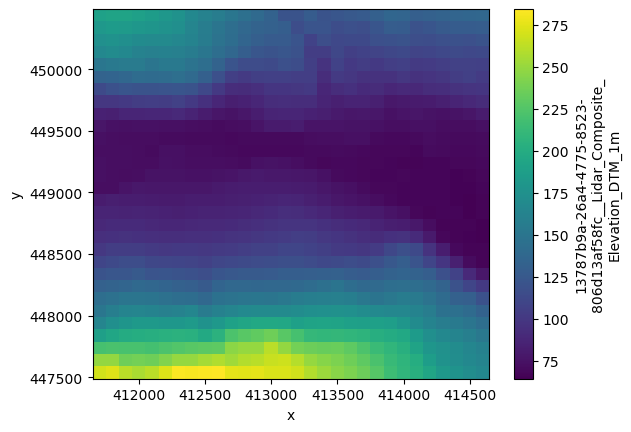

In [4]:
import rioxarray as rxr

array = array.coarsen(x=100,y=100, boundary="trim").mean()


array[ea_dtm.coverage_id].plot()